### Usage

In [1]:
from rnd_img import *

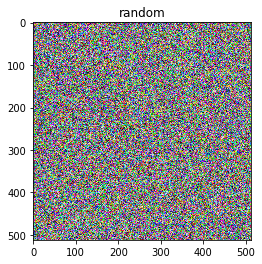

In [3]:
x = 512
y = 512

img1 = np.random.rand(x, y, 3)

show_img(img1)